<a href="https://colab.research.google.com/github/Trickshotblaster/nn-practices/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import requests

url = 'https://raw.githubusercontent.com/karpathy/makemore/master/names.txt'

response = requests.get(url)

with open('names.txt', 'wb') as f:
  f.write(response.content)

In [9]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [11]:
len(words)

32033

In [12]:
# stoi and itos
chars = sorted(list(set(''.join(words))))
stoi = {char:i+1 for i, char in enumerate(chars)}
stoi['.'] = 0
itos = {i:char for char, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [13]:
# make dataset
def build_dataset(words):
  block_size = 3 # context length
  X, Y = [], []
  for w in words:
    #print(w)
    context = [0] * block_size # list of zeros of length block size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '---->', itos[ix])
      context = context[1:] + [ix] # crop to remove previous, append new to end

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

X, Y = build_dataset(words)

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])
torch.Size([228146, 3]) torch.Size([228146])


In [14]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [15]:
# C should be a 27 x embedding dimension matrix
C = torch.randn((27, 2))

In [16]:
C[stoi['a']]

tensor([ 1.4866, -0.0693])

In [17]:
aonehot = F.one_hot(torch.tensor(stoi['a']), num_classes=27).float()
aonehot @ C

tensor([ 1.4866, -0.0693])

In [18]:
C[[5, 6, 7]]

tensor([[ 0.2459,  1.4069],
        [-0.6024, -0.7465],
        [-0.3981,  0.2014]])

In [19]:
C[torch.tensor([0,0,0])]

tensor([[-0.1456, -1.0500],
        [-0.1456, -1.0500],
        [-0.1456, -1.0500]])

In [20]:
for data in X[:5]:
  enc = C[data]
  print(enc)

tensor([[-0.1456, -1.0500],
        [-0.1456, -1.0500],
        [-0.1456, -1.0500]])
tensor([[-0.1456, -1.0500],
        [-0.1456, -1.0500],
        [ 2.0222,  0.1123]])
tensor([[-0.1456, -1.0500],
        [ 2.0222,  0.1123],
        [ 0.1285, -0.1582]])
tensor([[ 2.0222,  0.1123],
        [ 0.1285, -0.1582],
        [-1.8410, -0.7647]])
tensor([[ 0.1285, -0.1582],
        [-1.8410, -0.7647],
        [ 0.2459,  1.4069]])


In [21]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [22]:
%time
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.3 µs


torch.Size([228146, 6])

In [23]:
%time
torch.flatten(emb, start_dim=1).shape

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


torch.Size([228146, 6])

In [24]:
%time
torch.cat(torch.unbind(emb, 1), 1).shape

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


torch.Size([228146, 6])

Idk bruh I think mine is still better

In [25]:
a = torch.arange(18)
a, a.shape

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 torch.Size([18]))

In [26]:
a.view(3, 6) # holy moly where has this been all my life

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17]])

2 microseconds bruv

In [27]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [65]:
C = torch.randn((27, 10))
w1 = torch.randn(30, 200)
b1 = torch.randn(200)
w2 = torch.randn(200, 27)
b2 = torch.randn(27)

parameters = [C, w1, b1, w2, b2]
for p in parameters:
  p.requires_grad = True


In [66]:
sum(p.nelement() for p in parameters)

11897

In [67]:
lre = torch.linspace(-3, 0, 100000)
lrs = 10**lre


In [68]:
lri = []
lossi = []
stepi = []

In [86]:


for x in range(200000):

  # minibatch
  ix = torch.randint(0, Xtr.shape[0], (32, ))


  emb = C[Xtr[ix]]
  wi1 = emb.view(-1, 30) @ w1
  wi1b = wi1 + b1
  wi1ba = wi1b.tanh()
  wi2 = wi1ba @ w2
  logits = wi2 + b2



  for p in parameters:
    p.grad = None

  loss = F.cross_entropy(logits, Ytr[ix])
  loss.backward()
  lr = 0.1 if x < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  stepi.append(x)
  lossi.append(loss.log10().item())


print(loss.log10().item())

0.3502536714076996


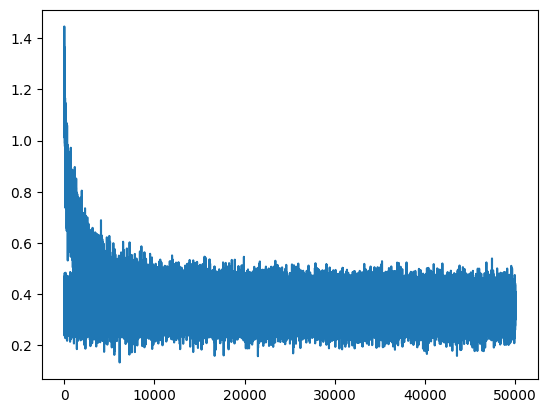

In [87]:
plt.plot(stepi, lossi)

In [88]:
emb = C[Xdev]
wi1 = emb.view(-1, 30) @ w1
wi1b = wi1 + b1
wi1ba = wi1b.tanh()
wi2 = wi1ba @ w2
logits = wi2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.231703042984009

In [89]:
emb = C[Xte]
wi1 = emb.view(-1, 30) @ w1
wi1b = wi1 + b1
wi1ba = wi1b.tanh()
wi2 = wi1ba @ w2
logits = wi2 + b2
loss = F.cross_entropy(logits, Yte)
loss.item()

2.232703685760498

In [90]:
emb = C[Xtr]
wi1 = emb.view(-1, 30) @ w1
wi1b = wi1 + b1
wi1ba = wi1b.tanh()
wi2 = wi1ba @ w2
logits = wi2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.2139103412628174

In [74]:
block_size = 3

In [107]:
def prompt(cx, max_length=15, samples=1):
  for x in range(samples):
    out = [stoi[c] for c in cx]

    if len(cx) > block_size:
      cx = cx[-block_size:]
    context = [0]*(block_size - len(cx)) + out
    while True:

      emb = C[torch.tensor([context])]
      h = torch.tanh(emb.view(1, -1) @ w1 + b1)
      logits = h @ w2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    print(''.join(itos[i] for i in out))

prompt("bro", samples=10)

broyyal.
brokmana.
broida.
brokemmabdysen.
brot.
broarmimaneesxen.
bro.
bro.
brosha.
bron.


In [109]:
prompt("z", samples=10)

zacylu.
zayvyas.
zorin.
zammazaela.
zarkith.
zavan.
zoyan.
zayaaley.
zaraemania.
zaman.


In [92]:
for _ in range(20):
  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1, -1) @ w1 + b1)
    logits = h @ w2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))

yvefki.
hax.
abdyaen.
vihaha.
kuda.
gdan.
kei.
nanellen.
quiladi.
yar.
karieaefiaca.
tudai.
rin.
klannie.
zah.
kamzayi.
akhy.
racie.
par.
oda.


In [84]:
prompt('z', samples=10)
print('\n')
prompt('w', samples=10)

zakhljrdgmglnak
zkzsrkeksjqkkpr
zawjlkmrbohabtd
zstjkdbmejkkmak
zealmetkzfjgals
zgsejmjdfmapjrl
zkrammraaaxlkmd
zjilludamszmman
zksamcjreamlmkg
zmsaaabwhmnbaso


wsazmehcgkhdrca
wwdmlgrpaaajfdk
wpajejjcadmckat
wijjjgakndjydnk
waajdkprstrjttj
wddedmskgkadaja
wjjbbakkzsbncla
wkosdjvjspabdsm
wjtaejdljklwtds
wkckjdrdchfdrsl


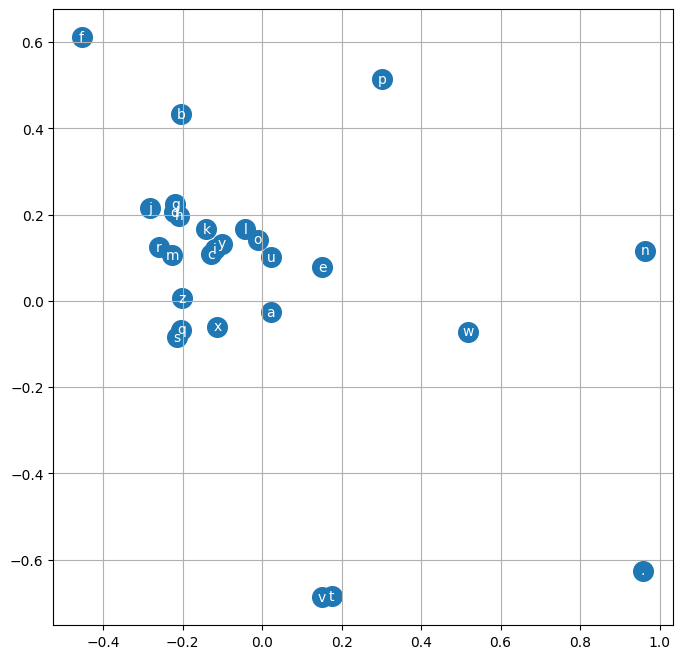

In [85]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

thought it was overfitting for a second there

In [39]:
torch.randint(0, X.shape[0], (32,))

tensor([179611, 119358, 186702,  21302, 129897,  96168,  87990, 154105, 174378,
        129397, 188138, 186027, 210454,  73601, 191668, 157278,  51361, 228138,
        129548, 215429,  12357, 185098, 200768, 195677,  39548,  31307, 129128,
        216988, 163714, 152336, 164222, 197012])

In [40]:
# train, val, test split
# 80%, 10%, 10%
